In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import zscore
from scipy.stats import skew

In [4]:
df = pd.read_csv("Downloads\iris.csv")

In [5]:
df.head()  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
df.shape

(150, 5)

In [7]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=['number']).columns
len(categorical), len(numerical)

(1, 4)

In [11]:
min_max = df[numerical].agg(['min', 'max'])
modes = df[numerical].mode().T
modes['mode'] = modes[0]

print("Minimum and Maximum")
print(min_max)
print("\nMode:")
print(modes['mode'])

Minimum and Maximum
     sepal_length  sepal_width  petal_length  petal_width
min           4.3          2.0           1.0          0.1
max           7.9          4.4           6.9          2.5

Mode:
sepal_length    5.0
sepal_width     3.0
petal_length    1.4
petal_width     0.2
Name: mode, dtype: float64


In [13]:
print(df.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Five Number Summary:
      sepal_length  sepal_width  petal_length  petal_width
min           4.3          2.0          1.00          0.1
25%           5.1          2.8          1.60          0.3
50%           5.8          3.0          4.35          1.3
75%           6.4          3.3          5.10          1.8
max           7.9          4.4          6.90          2.5


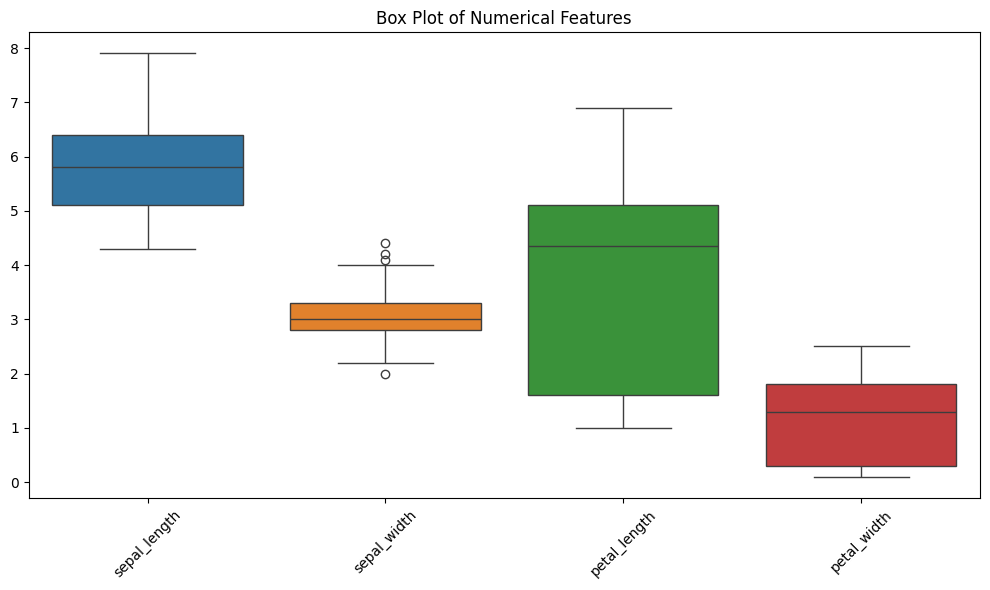

In [17]:
# List of numerical columns
numerical = df.select_dtypes(include='number').columns

# Five number summary (min, Q1, median, Q3, max)
five_number_summary = df[numerical].describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Five Number Summary:\n", five_number_summary)

# Box Plot for visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical])
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Compute Z-scores
z_scores = np.abs(zscore(df[numerical]))

# Define threshold for Z-score
threshold = 3

# Get boolean mask where Z-score > threshold
outliers_mask = (z_scores > threshold)

# Get rows with any outlier
outliers_df = df[outliers_mask.any(axis=1)]
print("Outlier Rows based on Z-score:\n", outliers_df)

Outlier Rows based on Z-score:
     sepal_length  sepal_width  petal_length  petal_width species
15           5.7          4.4           1.5          0.4  setosa


In [9]:
# Compute correlation matrix
corr_matrix = df[numerical].corr()

# Lists to store correlation types
high_pos_corr = []
high_neg_corr = []
no_corr = []

# Loop through correlation matrix to classify relationships
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
       
        if corr_val > 0.7:
            high_pos_corr.append((col1, col2, corr_val))
        elif corr_val < -0.7:
            high_neg_corr.append((col1, col2, corr_val))
        elif -0.1 < corr_val < 0.1:
            no_corr.append((col1, col2, corr_val))

print("High Positive Correlations:", high_pos_corr)
print("High Negative Correlations:", high_neg_corr)
print("No Correlations:", no_corr)

High Positive Correlations: [('sepal_length', 'petal_length', np.float64(0.8717537758865838)), ('sepal_length', 'petal_width', np.float64(0.8179411262715758)), ('petal_length', 'petal_width', np.float64(0.962865431402796))]
High Negative Correlations: []
No Correlations: []


Skewness Values:
 sepal_length    0.311753
sepal_width     0.315767
petal_length   -0.272128
petal_width    -0.101934
dtype: float64

Right Skewed Features:
 Series([], dtype: float64)

Left Skewed Features:
 Series([], dtype: float64)

Approximately Symmetric Features:
 sepal_length    0.311753
sepal_width     0.315767
petal_length   -0.272128
petal_width    -0.101934
dtype: float64


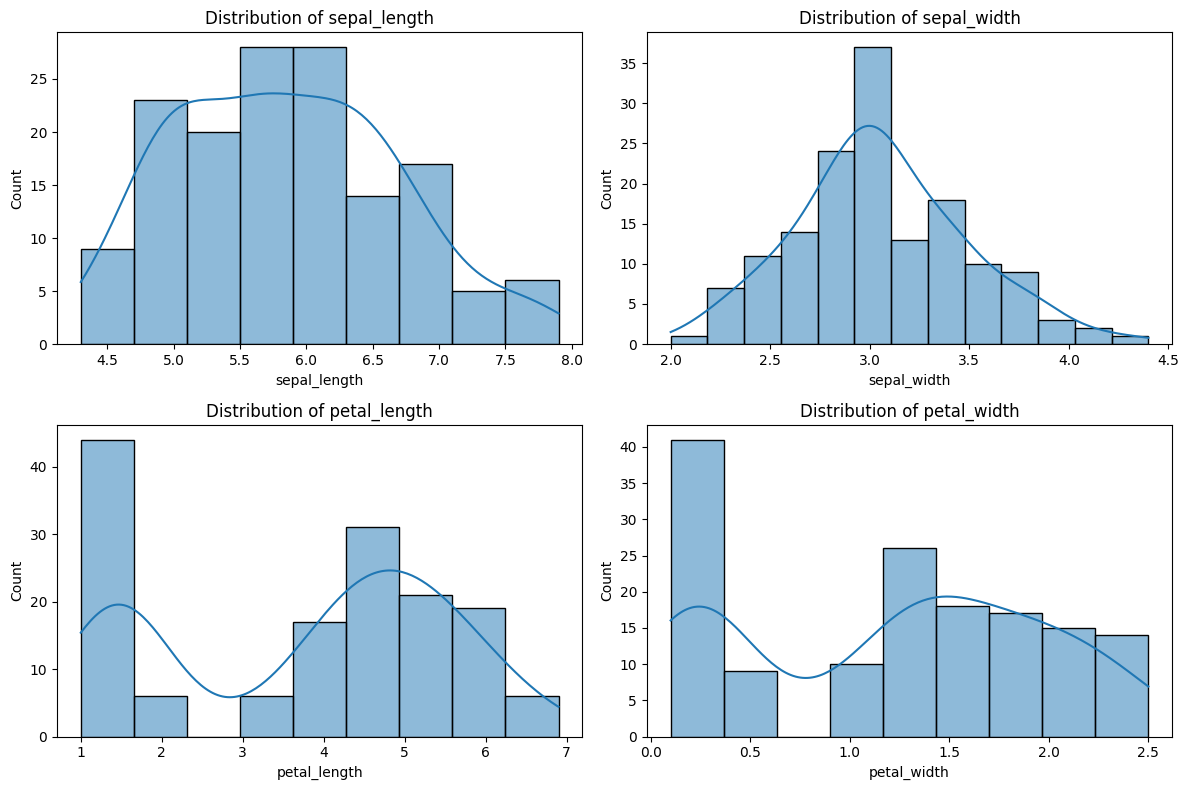

In [11]:
# Calculate skewness
skew_values = df[numerical].apply(skew)
print("Skewness Values:\n", skew_values)

# Categorize features
right_skew = skew_values[skew_values > 0.5]
left_skew = skew_values[skew_values < -0.5]
no_skew = skew_values[(skew_values >= -0.5) & (skew_values <= 0.5)]

print("\nRight Skewed Features:\n", right_skew)
print("\nLeft Skewed Features:\n", left_skew)
print("\nApproximately Symmetric Features:\n", no_skew)

# Distribution Plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

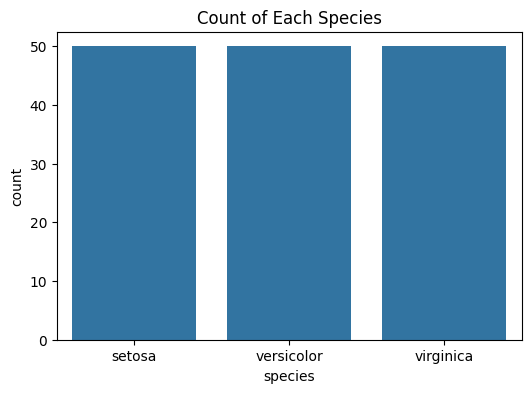

In [12]:
# 11. Univariate analysis for categorical variables using bar plot
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df)
plt.title("Count of Each Species")
plt.show()

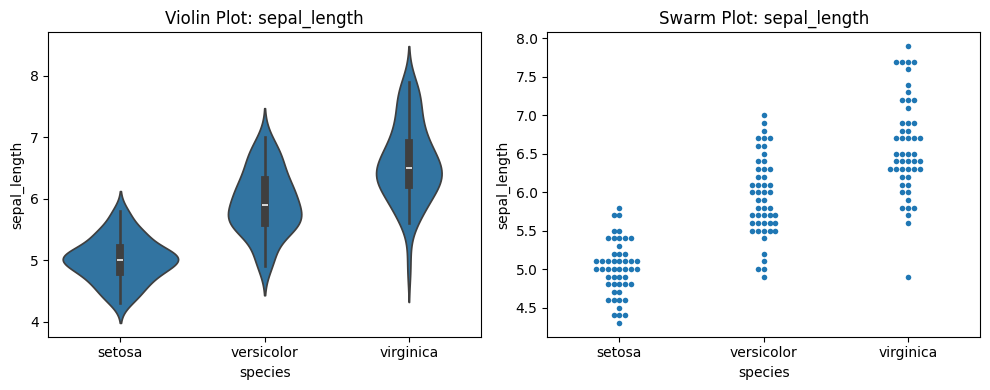

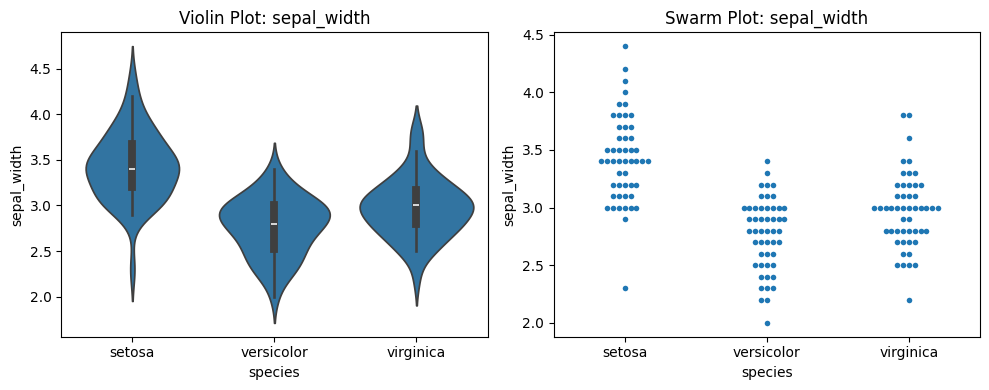

C:\Users\ezras\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


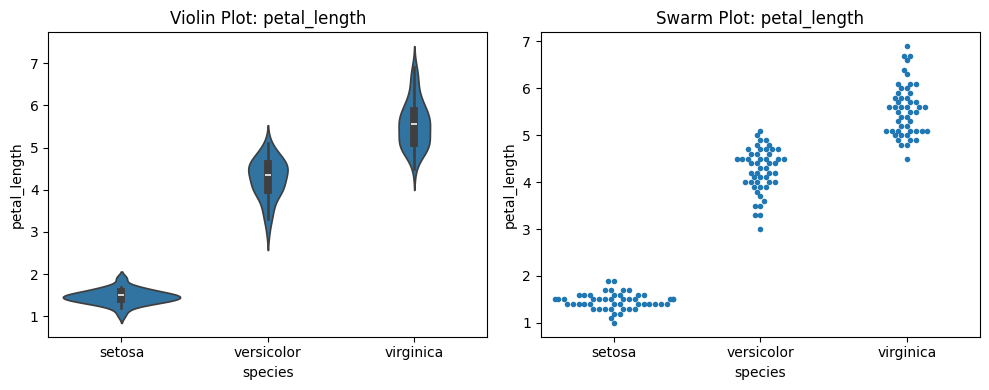

C:\Users\ezras\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ezras\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


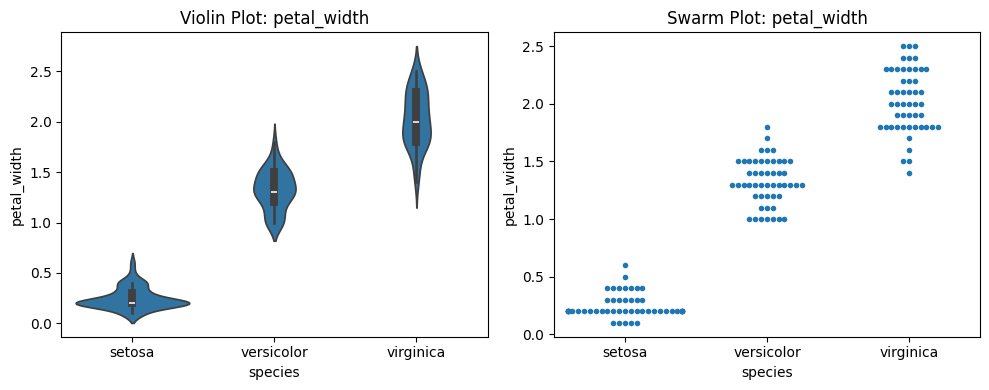

In [13]:
# 12. Univariate analysis for continuous variables using swarm and violin plots
for col in numerical:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.violinplot(x='species', y=col, data=df)
    plt.title(f"Violin Plot: {col}")
   
    plt.subplot(1, 2, 2)
    sns.swarmplot(x='species', y=col, data=df, size=4)
    plt.title(f"Swarm Plot: {col}")
    plt.tight_layout()
    plt.show()


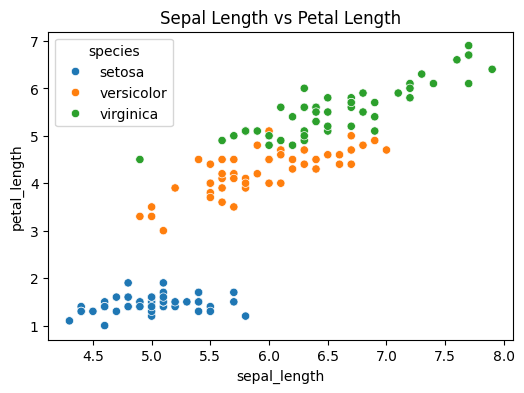

In [14]:
# 13. Scatter plot for relationship between two continuous variables
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')
plt.title("Sepal Length vs Petal Length")
plt.show()


<Figure size 800x600 with 0 Axes>

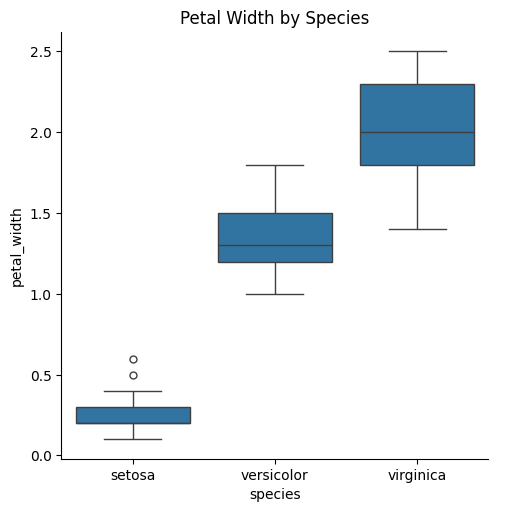

In [15]:
# 14. Bivariate analysis using categorical plot
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='species', y='petal_width', kind='box')
plt.title("Petal Width by Species")
plt.show()

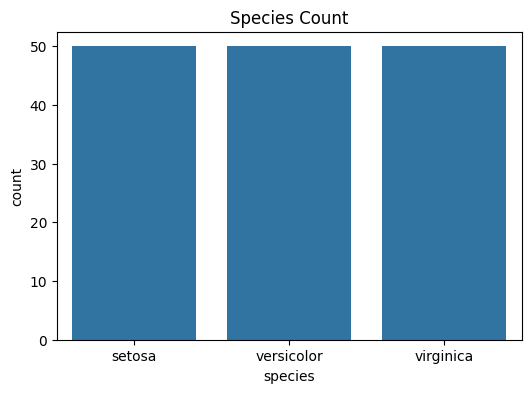

In [16]:
# 15. Count plot for categorical variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='species')
plt.title("Species Count")
plt.show()

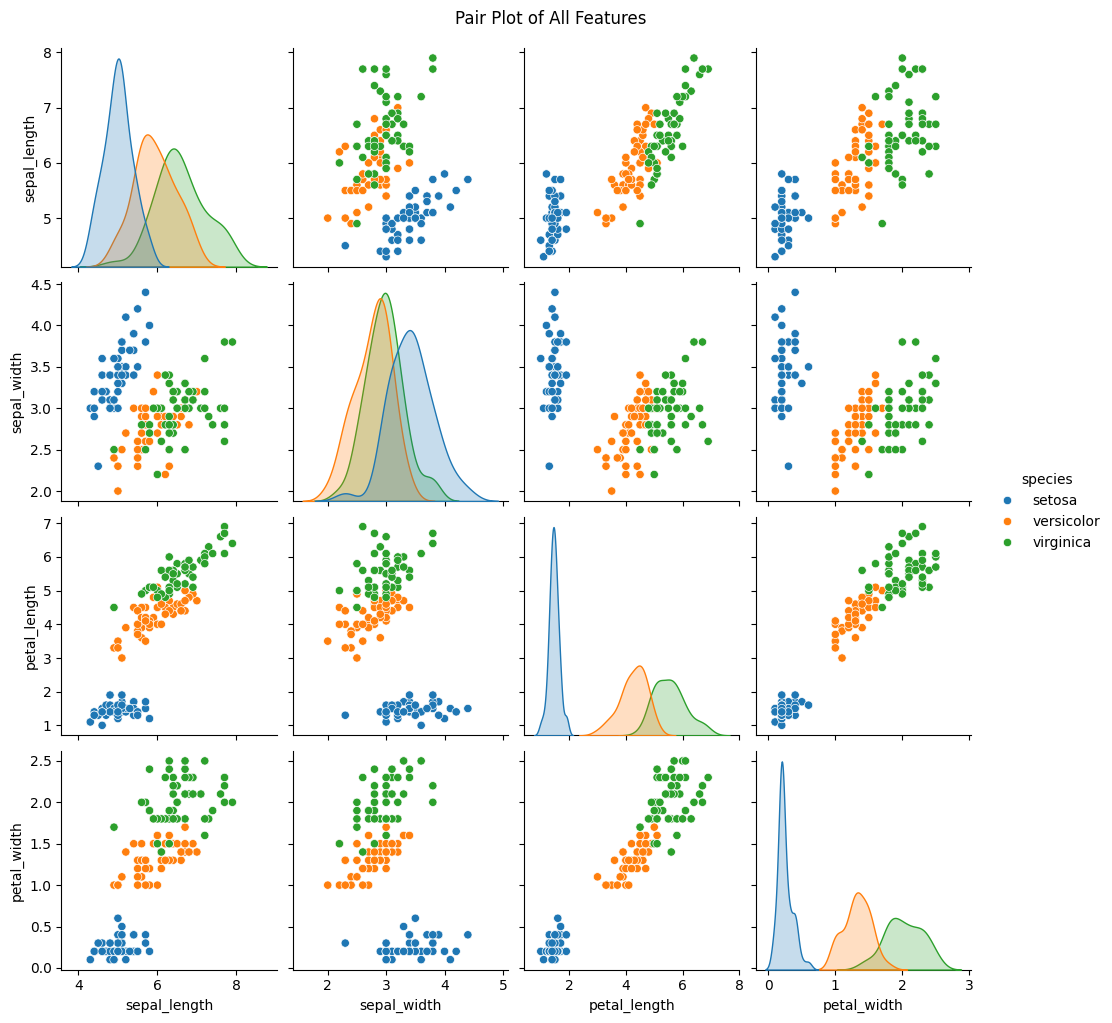

In [17]:
# 16. Multivariate analysis using pair plot
sns.pairplot(df, hue='species')
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()